In [ ]:
# dataset: airbnb
# Rentals median: city zipcodes/brooklyn zipcodes
# Sales medians: city zipcodes/brooklyn zipcodes
# Count sales: state wide zipcodes need to trim to city/brooklyn zipcodes

#### The analysis has three parts: summary statistics, plotting, and hypothesis testing.
Part 1. Summary statistics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmplot
from scipy.stats import ttest_ind
source1 = 'AirbnbSept19.csv'
source2 = 'Rolling Sales NYC/rollingsales_brooklyn_2019.csv'

abb_sept_2018 = 'AirBnB Listings/with zipcodes/df_abb_sept_2018.csv'
abb_oct_2018 = 'AirBnB Listings/with zipcodes/df_abb_oct_2018.csv'
abb_nov_2018 = 'AirBnB Listings/with zipcodes/df_abb_nov_2018.csv'
abb_dec_2018 = 'AirBnB Listings/with zipcodes/df_abb_dec_2018.csv'
abb_jan_2019 = 'AirBnB Listings/with zipcodes/df_abb_jan_2019.csv'
abb_feb_2019 = 'AirBnB Listings/with zipcodes/df_abb_feb_2019.csv'
abb_mar_2019 = 'AirBnB Listings/with zipcodes/df_abb_mar_2019.csv'

df_abb_sept_2018 = pd.read_csv(abb_sept_2018)
df_abb_oct_2018 = pd.read_csv(abb_oct_2018)
df_abb_nov_2018 = pd.read_csv(abb_nov_2018)
df_abb_dec_2018 = pd.read_csv(abb_dec_2018)
df_abb_jan_2019 = pd.read_csv(abb_jan_2019)
df_abb_feb_2019 = pd.read_csv(abb_feb_2019)
df_abb_mar_2019 = pd.read_csv(abb_mar_2019)

## Let's Look at only L-train neighborhood

In [28]:
# subset dataframe only to L train zipcode neighborhoods: 
L_train_zip = [11211, 11206, 11206, 11207, 11221, 11237, 11236, 11234, 11239]
df_abb_sept_2018_sub = df_abb_sept_2018[df_abb_sept_2018['zipcode'].isin(L_train_zip)]
df_abb_oct_2018_sub  = df_abb_oct_2018[df_abb_oct_2018['zipcode'].isin(L_train_zip)]
df_abb_nov_2018_sub  = df_abb_nov_2018[df_abb_nov_2018['zipcode'].isin(L_train_zip)]
df_abb_dec_2018_sub  = df_abb_dec_2018[df_abb_dec_2018['zipcode'].isin(L_train_zip)]
df_abb_jan_2019_sub  = df_abb_jan_2019[df_abb_jan_2019['zipcode'].isin(L_train_zip)]
df_abb_feb_2019_sub  = df_abb_feb_2019[df_abb_feb_2019['zipcode'].isin(L_train_zip)]
df_abb_mar_2019_sub  = df_abb_mar_2019[df_abb_mar_2019['zipcode'].isin(L_train_zip)]

We want to know if the shut down affect the distribution airbnb availability for rentals. The median is more robust to outliers. So, we are using the median instead of the mean.

In [107]:
print('For sept 2018, the median is', df_abb_sept_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_sept_2018_sub['availability_365'].std())
print('For Dec 2019, the median is', df_abb_dec_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_dec_2018_sub['availability_365'].std())
print('For Mar 2019, the median is', df_abb_mar_2019_sub['availability_365'].median(), 'the standard deviation is', df_abb_mar_2019_sub['availability_365'].std())


For sept 2018, the median is 19.0 the standard deviation is 125.59390583452448
For Dec 2019, the median is 37.0 the standard deviation is 131.24231417926504
For Mar 2019, the median is 26.0 the standard deviation is 126.74027183407244


As shown above, shut down may affect rental. In particular, in December 2018, median rental availability went up to 37. We should expect less available rentals in Christmas month. The market is also more volatile. The standard deviation is 131.24. Hihger than both September and March.

We can't yet claim less people using Airbnb is due to L-train shutdown. We need to look at how other neighbhood did, was there also a reduction in rental? We will look at that below.

In [30]:
df_abb_mar_2019_sub

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zipcode
2,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.70856,-73.94236,Private room,70,5,39,2018-12-07,0.35,3,217,11211
18,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,127,2019-02-27,1.07,1,183,11211
24,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.08,1,0,11211
39,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,306,11221
40,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,207,2019-02-03,1.82,2,33,11237
56,14290,* ORIGINAL BROOKLYN LOFT *,56104,James,Brooklyn,Williamsburg,40.70420,-73.93560,Entire home/apt,215,3,76,2019-02-04,0.67,1,162,11206
59,14377,Williamsburg 1 bedroom Apartment,56512,Joanna,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,140,3,104,2019-02-07,0.93,1,5,11211
65,15385,"Very, very cozy place",60252,Cristina,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,78,2,37,2019-02-08,0.34,1,297,11211
76,17297,Modern Brownstone living1,67105,Nicolas,Brooklyn,Bedford-Stuyvesant,40.68134,-73.93637,Entire home/apt,180,5,57,2019-01-02,0.68,3,147,11221
77,17298,Modern Brownstone living3,67105,Nicolas,Brooklyn,Bedford-Stuyvesant,40.68291,-73.93664,Entire home/apt,180,5,37,2019-01-03,0.44,3,167,11221


In [117]:
# print(df_abb_sept_2018_sub['availability_365'].median())
# print(df_abb_oct_2018_sub['availability_365'].median())
# print(df_abb_nov_2018_sub['availability_365'].median())
# print(df_abb_dec_2018_sub['availability_365'].median())
# print(df_abb_jan_2019_sub['availability_365'].median())
# print(df_abb_feb_2019_sub['availability_365'].median())
# print(df_abb_mar_2019_sub['availability_365'].median())

median_of_availability = np.array([df_abb_sept_2018_sub['availability_365'].median(), df_abb_oct_2018_sub['availability_365'].median(), 
                          df_abb_nov_2018_sub['availability_365'].median(), df_abb_dec_2018_sub['availability_365'].median(), 
                          df_abb_jan_2019_sub['availability_365'].median(), df_abb_feb_2019_sub['availability_365'].median(), 
                          df_abb_mar_2019_sub['availability_365'].median()])
median_of_availability = pd.Series(median_of_availability, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
print('The median of availatility for each month is:\n')
print(median_of_availability)

19.0
19.0
27.0
37.0
37.0
32.0
26.0
The median of availatility for each month is:

Sept    19.0
Oct     19.0
Nov     27.0
Dec     37.0
Jan     37.0
Feb     32.0
Mar     26.0
dtype: float64


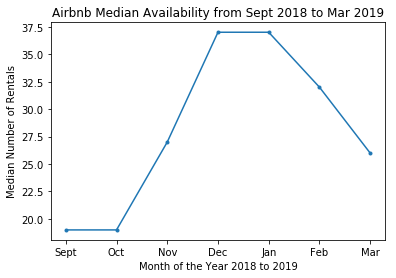

In [75]:
# plot rental availability of L-train neighborhood
plt.plot(median_of_availability, '.-')
plt.title('Airbnb Median Availability from Sept 2018 to Mar 2019')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Number of Rentals')
plt.show()

L-train shut down did affect Airbnb rental. From the plot, we see that there is spike available rentals in Nov, Dec, and Jan. And then, less availability when L-train partially resumed after Jan 3.

In [76]:
# percentage of availabile rentals for Sept, Nov, Jan, Mar
print(df_abb_sept_2018_sub['availability_365'].sum()/df_abb_sept_2018_sub['availability_365'].shape[0]/365)
print(df_abb_nov_2018_sub['availability_365'].sum()/df_abb_nov_2018_sub['availability_365'].shape[0]/365)
print(df_abb_jan_2019_sub['availability_365'].sum()/df_abb_jan_2019_sub['availability_365'].shape[0]/365)
print(df_abb_mar_2019_sub['availability_365'].sum()/df_abb_mar_2019_sub['availability_365'].shape[0]/365)

0.26319526470378724
0.2752516867716213
0.28499585186927184
0.2686946548287132


Compare September 2018 to January 2019, there is a reduction of 0.285-0.263 = 2.2% in rental.

## Let's look at not L-train neighborhood

In [78]:
# not L-train neighborhood
# Booking Trend
df_abb_sept_2018['availability_365'].value_counts().mean()
df_abb_sept_2018_sub_not_L_train_nbhd = df_abb_sept_2018[~df_abb_sept_2018['zipcode'].isin(L_train_zip)]
df_abb_oct_2018_sub_not_L_train_nbhd  = df_abb_oct_2018[~df_abb_oct_2018['zipcode'].isin(L_train_zip)]
df_abb_nov_2018_sub_not_L_train_nbhd  = df_abb_nov_2018[~df_abb_nov_2018['zipcode'].isin(L_train_zip)]
df_abb_dec_2018_sub_not_L_train_nbhd  = df_abb_dec_2018[~df_abb_dec_2018['zipcode'].isin(L_train_zip)]
df_abb_jan_2019_sub_not_L_train_nbhd  = df_abb_jan_2019[~df_abb_jan_2019['zipcode'].isin(L_train_zip)]
df_abb_feb_2019_sub_not_L_train_nbhd  = df_abb_feb_2019[~df_abb_feb_2019['zipcode'].isin(L_train_zip)]
df_abb_mar_2019_sub_not_L_train_nbhd  = df_abb_mar_2019[~df_abb_mar_2019['zipcode'].isin(L_train_zip)]

In [119]:
print('For sept 2018, the median is', df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].std())
print('For Dec 2019, the median is', df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].std())
print('For Mar 2019, the median is', df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].std())


For sept 2018, the median is 55.0 the standard deviation is 134.66753994674286
For Dec 2019, the median is 70.0 the standard deviation is 139.20067385393338
For Mar 2019, the median is 65.0 the standard deviation is 135.48929410793562


In [118]:
# print(df_abb_sept_2018_sub_not_L_train_nbhd ['availability_365'].median())
# print(df_abb_oct_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_nov_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_jan_2019_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_feb_2019_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median())

print('The median of availatility for each month is:\n')
median_of_availability_not_L_train_nbhd = np.array([df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].median(), df_abb_oct_2018_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_nov_2018_sub_not_L_train_nbhd['availability_365'].median(), df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_jan_2019_sub_not_L_train_nbhd['availability_365'].median(), df_abb_feb_2019_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median()])
median_of_availability_not_L_train_nbhd = pd.Series(median_of_availability_not_L_train_nbhd, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
print(median_of_availability_not_L_train_nbhd)

The median of availatility for each month is:

Sept    55.0
Oct     58.0
Nov     61.0
Dec     70.0
Jan     78.0
Feb     75.0
Mar     65.0
dtype: float64


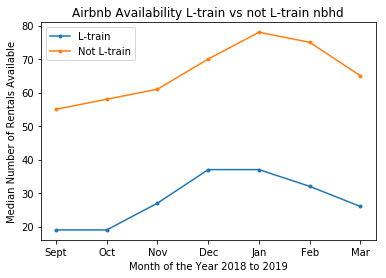

In [86]:
# plot median rental availability of L-train vs not L-train neighborhood
plt.plot(median_of_availability, '.-', label='L-train')
plt.plot(median_of_availability_not_L_train_nbhd, '.-', label='Not L-train')
plt.title('Airbnb Availability L-train vs not L-train nbhd')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Number of Rentals Available')
plt.legend()
plt.show()

In [ ]:
# plotting
# 1. a) scatterplot b) bar graph c) boxplot
# 2. a) map plotted with airbnb NYC sales and rental b) distance from train: overlaying a .3 - .5 mile circle around train stations
# 3. heatmap

In [123]:
latitudes = df_abb_sept_2018_sub["latitude"]
longitudes = df_abb_sept_2018_sub["longitude"]


40.70210475065906
-73.93710661921222


In [127]:
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(latitudes.mean(), longitudes.mean(), 12)
gmap.heatmap(latitudes, longitudes)
gmap.draw("my_heatmap.html")

We perform three hypothesis tests for September, December, and March, respectively. We want to see if there is a statistical significance between L-train and not L-train neighbhorhoods.

In [133]:
# testing hypthesis
# t-test
print(ttest_ind(df_abb_sept_2018_sub['availability_365'], df_abb_sept_2018_sub_not_L_train_nbhd['availability_365']))
print(ttest_ind(df_abb_dec_2018_sub['availability_365'], df_abb_dec_2018_sub_not_L_train_nbhd['availability_365']))
print(ttest_ind(df_abb_mar_2019_sub['availability_365'], df_abb_mar_2019_sub_not_L_train_nbhd['availability_365']))


Ttest_indResult(statistic=-14.224628704879674, pvalue=7.913050776111513e-46)
Ttest_indResult(statistic=-14.476736677354367, pvalue=2.129385279399251e-47)
Ttest_indResult(statistic=-15.002993704087904, pvalue=9.066640349370396e-51)


We see that the p-value for all three months have p-value close to zero. We say that there is a difference in neighborhood rental availability.